## pyroomacoustics demo

在本脚本中，我们展示了一些有关`pyroomacoustics`的一些特性：

- （1）相关python类变成与方便的面向对象接口。
- （2）房间脉冲响应生成器（RIR，Room Impulse Response）。
- （3）相关算法设计

本脚本的演示示例列表：
- 1、创建一个2D/3D房间
- 2、添加声源和麦克风
- 3、RIR生成以及传播仿真（propagation simulation）
- 4、波束形成（Beamforming）
- 5、波达方向（Direction-of-Arrival）
- 6、自适应滤波（Adaptive filtering）
- 7、短时傅利叶转换（STFT）处理
- 8、源分离（Source Separation）

更多内容可以参考[Pyroomacoustics的Github仓库](https://github.com/LCAV/pyroomacoustics)或者参考[论文](https://arxiv.org/pdf/1710.04196.pdf)，引用格式如下所示：

R. Scheibler, E. Bezzam, I. Dokmanić, Pyroomacoustics: A Python package for audio room simulations and array processing algorithms, Proc. IEEE ICASSP, Calgary, CA, 2018.

In [1]:
# 倒入必要的软件包
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import fftconvolve

import IPython
import pyroomacoustics as pra

### 一、创建2D/3D房间

**注意：**
- 在定义房间的2D空间节点时候，需要<font color="red">注意其顺序</font>，否则不会出现预期的房间形状。
- <font color="red">在构建节点时候需要逆时针方向一次定义节点坐标</font>。

[[0 0 5 5 3 3]
 [0 3 3 1 1 0]]


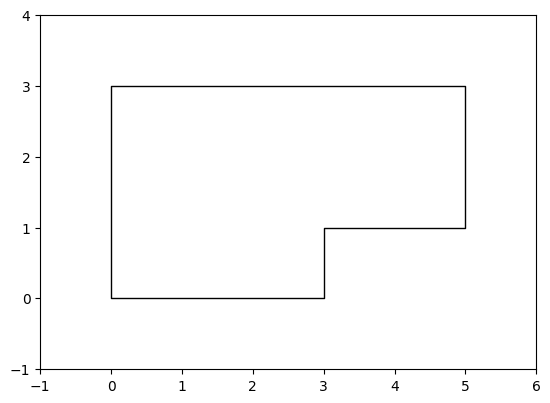

In [16]:
# 定义房间的二维空间节点
corners = np.array([[0,0], [0,3], [5,3], [5,1], [3,1], [3,0]]).T
print(corners)

# 由二维空间节点构造2D房间
room = pra.Room.from_corners(corners)
# print(type(room))   # 查看room的数据类型

# 绘制2的房间
fig, ax = room.plot()
ax.set_xlim([-1, 6])
ax.set_ylim([-1, 4]);

如果想要构建3D房间，我们可以将构建的2D房间拉伸一个特定的长度。

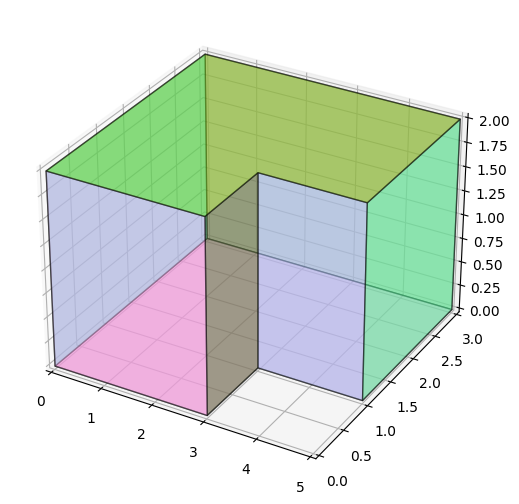

In [17]:
room.extrude(2.)

fig, ax = room.plot()

### 二、添加声源与麦克风

我们可以很方便的通过`add_source`方法给创建的房间模型添加声源。

另外，我们还可以将`numpy`数组作为声源信号。**说明**：后续使用自己构建的声源数据的时候会用到这个方法。

